# Unconstrained Optimization methods
## Prepared by Maxim Khagay
### School of Science and Technology, Nazarbayev University

## Abstract
This report will demonstrate two ways to solve optimization problem of two dimentional function $f(x, y)$. In our case we need to find minimum of function. These methods are steepest descent method and random search method. For random search method we will see how the error of this method scales with the number of iterations. Computational cost of each method will be considered. Finally, both methods will be run again at fixed $y$.

## Introduction
Both methods are useful to find optimaztion solution of function. They use different methods:
### Theory
Two methods are described in Chapra and Canale's book.
Let's briefly introduce them
#### Steepest search method
First of all, for steepest descent method we use iterations to improve our $x$ and $y$ with a condition until we reach acceptable precision. In each iteration we will calculate optimal $h_{opt}$ at which $g(h)$ is minimal by using gradient of function. After that we use $h_{opt}$ to take new values of $x$ and $y$. Actually to find $h_{opt}$ we use golden section method, it is covered in Chapra and Canale's book. Also as it can be seen in the book we derive error the following way:

\begin{equation*}
R = \frac{(\sqrt5 - 1)}{2}
\end{equation*}

\begin{equation*}
error = (1-R)\times|\frac{x_u-x_l}{h_{opt}}|\times100%\n
\end{equation*}

#### Random search method
This method just calculates function of new values(generated randomly) and improve $x$ and $y$ if new values are better. Because of using random it is not easy to predict behavior of this method.

To find computational cost we need to find time of each method. We will try to run each method 10 times and take total time and average from it. The main purpose to do it is other process of PC which can affect on process of method and by using average we can compare computational cost, because computational cost directly depends on number of executed iteration in code and number executed iterations is actually a time. 

# Formulation of the problem
We need to find minimal optimization of function $f(x,y)=(x-3)^2+(y-2)^2$
## Theoretical expectations
It is simple function and we can derive that:

First derivative for $x$ => 2(x-3) = 0, x = 3

First derivative for $y$ => 2(y-2) = 0, y = 2

Both second derivatives of $x$ and $y$ are 2, so we found minimum of function in $f(3, 2) = 0$

Now we can expect from practice that $x = 3$ and $y = 2$ 

Also we can predict that one iteration is enough to reach from any points of initial $x$ and $y$ because function is paraboloid for steepest search method from:
$g(h) = f(x_0 + 2(x_0-3)h,y_0+2(y_0-2)h)$

$g'(h) = (x_0-3)^2(1+2h)^2+(y_0-2)^2(1+2h)^2 = f(x_0,y_0)(1+2h)^2$
from that we know that it is positive and we found $h = -\frac{1}{2}$ 

# Methods

Here we introduce our function $f(x, y)$.

In [10]:
from math import sqrt
from time import time

def f(x, y):
    return (x-3)**2+(y-2)**2

Steepest search method is introduced here. We took initial values of $x$ and $y$ equal to 0. Also our function of gradient $g(h)$, we use $golden(xl, xu)$ to return a $h_{opt}$ with error precision $10^{-10}$, we use error from theory part. As we know that theoreticaly is $-\frac{1}{2}$ we take range for golden section method from -1 to 1. And we print obtained values of $x$ and $y$

In [11]:
def g(h):
    return f(x0+2*(x0-3)*h,y0+2*(y0-2)*h)
    
def golden(xl, xu):
    R = (sqrt(5)-1)/2
    e = (1-R)*abs((xu-xl)/(min(xl, xu)))
    while(e > 1e-10):
        d = R*(xu-xl)
        x1 = xl + d
        x2 = xu - d
        if (g(x1) < g(x2)):
            xl = x2
            x2 = x1
            x1 = xl + R*(xu-xl)
        else:
            xu = x1
            x1 = x2
            x2 = xu - R*(xu-xl)
        e = (1-R)*abs((xu-xl)/(min(xl, xu)))*100
        
    if (g(xl) < g(xu)):
        return xl
    else:
        return xu

x0 = 0
y0 = 0

while(f(x0, y0) > 1e-10):
    h = golden(-1, 1)
    x0 = x0 + 2*(x0-3)*h
    y0 = y0 + 2*(y0-2)*h
print(x0, y0)

2.9999999999974007 1.9999999999982672


Here we introduce random search method. We put precision equals to $10^{-5}$. We use $mn$ as our minimum of function and recalculate values of $x$ and $y$. Code used Merssene Twisted algorithm to generate fixed random values. We get values of $x$ and $y$ in range from -5 to 5. Finally we print obtained values. 

In [12]:
from random import random, seed
mn = 100000
xl = yl = -5
xu = yu = 5
xmin = ymin = 0
while(f(xmin,ymin) > 1e-5):
    x = xl + (xu-xl)*random()
    y = yl + (yu-yl)*random()
    fnew = f(x,y)
    if (fnew < mn):
        xmin = x
        ymin = y
        mn = fnew
print(xmin, ymin)
    

2.997304687334039 1.9996029904577908


This part of code demonstrates 10000 iterations in loop and for each "good" iteration we save $error$. Finally we plot a graph and we can see behavior of $error$. We used $seed(1)$ to take fixed random values.

2.9890545889386564 1.999355167316617


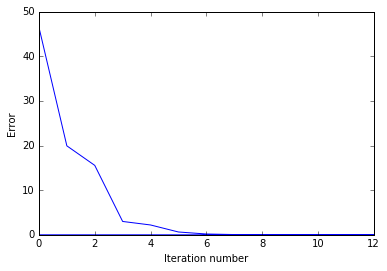

last good iteration on 9010


In [13]:
%matplotlib inline
from matplotlib.pyplot import *

seed(1)
n = np.array(np.zeros(100))
r = np.array(np.zeros(100))
xl = yl = -5
xu = yu = 5
xmin = ymin = 0
i = -1
mn = 10000
for j in range(10000):
    x = xl + (xu-xl)*random()
    y = yl + (yu-yl)*random()
    fnew = f(x,y)
    if (fnew < mn):
        xmin = x
        ymin = y
        mn = fnew
        i += 1
        n[i] = i
        r[i] = fnew
        xx = j
print(xmin, ymin)
xlabel("Iteration number"); ylabel("Error")
plot(n,r)
show()

print("last good iteration on",xx)

Here we calculated average time on each steepest search method

In [14]:
avg1 = 0
for t in range(10):
    start = time()
    x0 = 0
    y0 = 0
    while(f(x0, y0) > 1e-5):
        h = golden(-10, 10)
        x0 = x0 + 2*(x0-3)*h
        y0 = y0 + 2*(y0-2)*h
    end = time()
    avg1 += end-start
avg1 /= 10
print(avg1)
aa = avg1

0.00030026435852050783


Here we calculated average time on each random search method. As you see, we put $seed()$, it means that now we don't have fixed random values. We need a few seconds. Please wait.

In [15]:
avg2 = 0
seed()
for t in range(10):
    start = time()
    mn = 100000
    xl = yl = -5
    xu = yu = 5
    xmin = ymin = 0
    while(f(xmin,ymin) > 1e-5):
        x = xl + (xu-xl)*random()
        y = yl + (yu-yl)*random()
        fnew = f(x,y)
        if (fnew < mn):
            xmin = x
            ymin = y
            mn = fnew
    end = time()
    avg2 += end-start
avg2 /= 10
print(avg2)
bb = avg2

9.527218246459961


In next two parts of code, we fix $y$ at 2 and search only $x$ and recalculate average time.

In [16]:
avg1 = 0
for t in range(10):
    start = time()
    x0 = 0
    y0 = 2
    while(f(x0, y0) > 1e-5):
        h = golden(-10, 10)
        x0 = x0 + 2*(x0-3)*h
    end = time()
    avg1 += end-start
avg1 /= 10
print(avg1)
aaa = avg1

0.0003984689712524414


In [17]:
avg2 = 0
seed()
for t in range(10):
    start = time()
    mn = 100000
    xl = -5
    xu = 5
    xmin = 0
    ymin = 2
    while(f(xmin,ymin) > 1e-5):
        x = xl + (xu-xl)*random()
        fnew = f(x,ymin)
        if (fnew < mn):
            xmin = x
            mn = fnew
    end = time()
    avg2 += end-start
avg2 /= 10
print(avg2)
bbb = avg2

0.0020009994506835936


## Discussion
First of all, two methods work correctly. Steepest and random search methods give a correct values of $x$ and $y$, they are very close to true values $x=3$ and $y=2$ and satisfy to our precision in each method. 

From Error vs Iteration graph we see that the error converges to zero. Let me remind that our true value of optimal $f(x,y)$ equals to 0. So $Error = f(x_0,y_0) - true value$, so $Error = f(x_0, y_0)$. We see that 12 "good" iterations out of 10000 iterations were enough to reach true value with a given precision.

Let's compare computational cost of two methods. As we said in theory part, we use average time of each method. Steepest search method is faster than random search method, we know that one iteration was enough for our simple function and because of it we get this result. Actually for random seach method time depends on our range, if we take more closer range time will decrease, accordingly computational cost will decrease. 

Below you see how much Steepest method is faster than Random method

In [18]:
print(bb/aa)

31729.43433380975


When we use fixed $y = 2$

In [19]:
print("Difference between fixed y and non-fixed in time of Steepest method's time is ", aaa-aa)
print("Proportion between fixed y and non-fixed in of Random method's time is ", bb/bbb, "times")

Difference between fixed y and non-fixed in time of Steepest method's time is  9.820461273193356e-05
Proportion between fixed y and non-fixed in of Random method's time is  4761.229816032791 times


We did not predict difference of Steepest method, is it positive or not? It depends on PC processes. However we can run many times Random method and see that after fixed $y$ computational cost will decrease, because we don't need calculate $y$ parameter.     

## Conclusion
As we see from code results, two methods are reliable to find optimal solution of function. As we said our function is simple for steepest method, so it doesn't matter for computational cost of this method, in both cases of $y$ is almost the same. Whereas we can't predict behavior of random search method, we got that for fixed $y$ it takes less time. Let's notice that there are not a lot of  "good" iterations in random method, while we spend a huge amount of needless iterations, where our values didn't improve. 